<a href="https://colab.research.google.com/github/mashaan14/only-numpy/blob/main/only_numpy_pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coding Principal Component Analysis (PCA) using numpy functions

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
np.random.seed(0)
X = np.concatenate((np.ones((5, 2)), 5*np.ones((5, 2))), axis=0)
X = X+np.random.normal(0, 0.5, size=X.shape)
display(pd.DataFrame(X))

,0,1
0,1.882026,1.200079
1,1.489369,2.120447
2,1.933779,0.511361
3,1.475044,0.924321
4,0.948391,1.205299
5,5.072022,5.727137
6,5.380519,5.060838
7,5.221932,5.166837
8,5.747040,4.897421
9,5.156534,4.572952


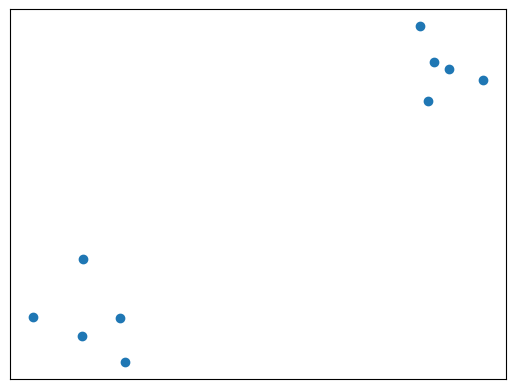

In [ ]:
plt.scatter(X[:,0], X[:,1]);
plt.tick_params(axis='both',which='both',bottom=False,top=False,left=False,right=False,
                labelbottom=False,labeltop=False,labelleft=False,labelright=False);
plt.savefig('data.png', bbox_inches='tight', dpi=600)

## Step 1: Standardize the data
The dataset should have a zero mean an unit variance. This process is called standardization. *italicized text*

In [ ]:
XNormed = (X - X.mean())/(X.std())

## Step 2: Compute the covariance matrix
The diagonal elements in the covariance matrix represent the variance of the features, while the off-diagonal elements represent the covariance between each pair of features.



In [ ]:
cov_mat = np.cov(XNormed.T)
display(pd.DataFrame(cov_mat))

,0,1
0,1.053560,1.047127
1,1.047127,1.156338


## Step 3: Perform eigendecomposition on the covariance matrix
The eigenvectors represent the new space with a magnitude equal to their corresponding eigenvalues.

In [ ]:
eigenvalues, eigenvectors = np.linalg.eig(cov_mat)

In [ ]:
display(pd.DataFrame(eigenvalues))
display(pd.DataFrame(eigenvectors))

,0
0,0.056561
1,2.153336


,0,1
0,-0.724230,-0.689559
1,0.689559,-0.724230


## Step 4: Order the eigenvectors

In [ ]:
# Order the eigenvectors in a decreasing order based on the magnitude of their corresponding eigenvalues
eigenvectors_sorted = eigenvectors[:,eigenvalues.argsort()[::-1]]
display(pd.DataFrame(eigenvectors_sorted))

,0,1
0,-0.689559,-0.724230
1,-0.724230,0.689559


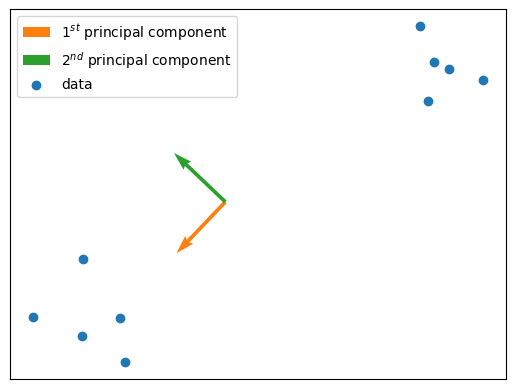

In [ ]:
legend_label = ['$1^{st}$ principal component', '$2^{nd}$ principal component', 'data']
new_colors = ['#ff7f0e', '#2ca02c', '#1f77b4']
for i in range(eigenvectors_sorted.shape[1]):
  plt.quiver(3, 3 , eigenvectors_sorted[0,i], eigenvectors_sorted[1,i], scale=7, label=legend_label[i], color=new_colors[i])

plt.scatter(X[:,0], X[:,1], label=legend_label[-1], c=new_colors[-1]);
plt.tick_params(axis='both',which='both',bottom=False,top=False,left=False,right=False,
                labelbottom=False,labeltop=False,labelleft=False,labelright=False);
plt.legend()
plt.savefig('eigenvectors_sorted.png', bbox_inches='tight', dpi=600)

## Step 5: Compute the transformation

In [ ]:
X_transformed = np.dot(XNormed, eigenvectors_sorted)

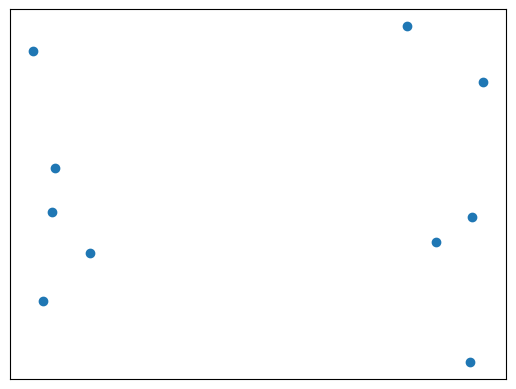

In [ ]:
plt.scatter(X_transformed[:,0], X_transformed[:,1]);
plt.tick_params(axis='both',which='both',bottom=False,top=False,left=False,right=False,
                labelbottom=False,labeltop=False,labelleft=False,labelright=False);
plt.savefig('X_transformed.png', bbox_inches='tight', dpi=600)